# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Dataset

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

## Data Exploration

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Description (Numerical)

In [5]:
round(df.describe(), 2) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


### Data Description (Categorical)

In [6]:
round(df.describe(exclude=['float', 'int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Data Types

In [7]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


### Missing Values

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
print((df.isna().sum()/len(df))*100)


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


### Unique Values

In [10]:
# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_values}")

Number of unique values in gender: 3
Number of unique values in ever_married: 2
Number of unique values in work_type: 5
Number of unique values in Residence_type: 2
Number of unique values in smoking_status: 4


### Distribution of Categorical Features

In [11]:
# Distribution of categorical features
for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"Distribution of values in {col}:\n{value_counts}\n")

Distribution of values in gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Distribution of values in ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Distribution of values in work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Distribution of values in Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Distribution of values in smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



### Duplicate Rows

In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicates if any
if duplicate_rows > 0:
    print("Duplicate rows:\n", df[df.duplicated()])

Number of duplicate rows: 0


## Data Visualization

### Distribution of Categorical Features

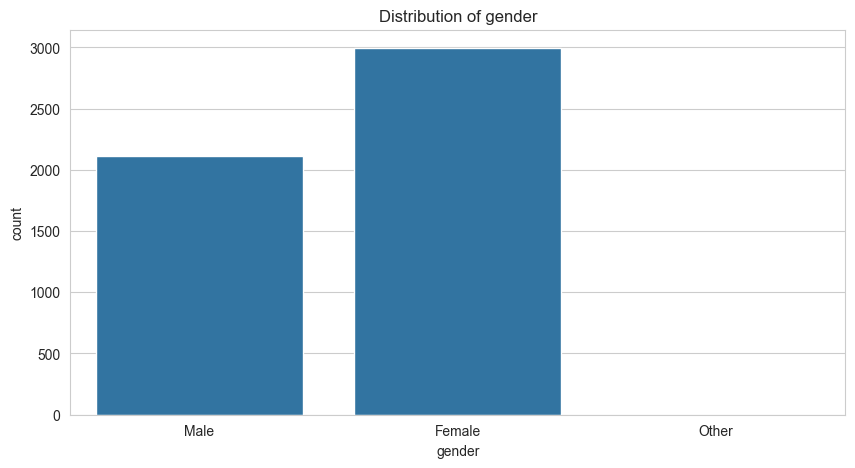

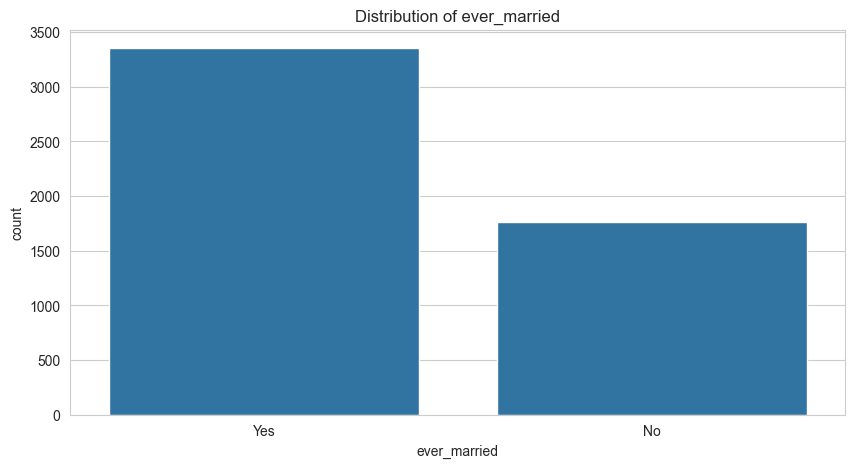

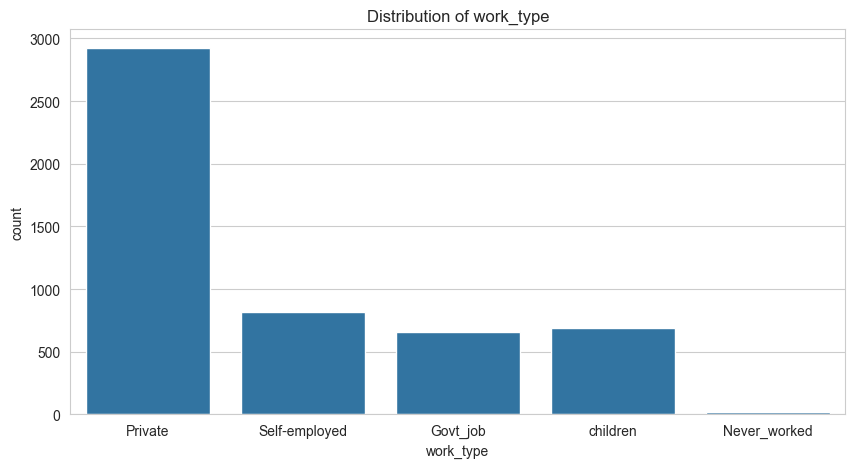

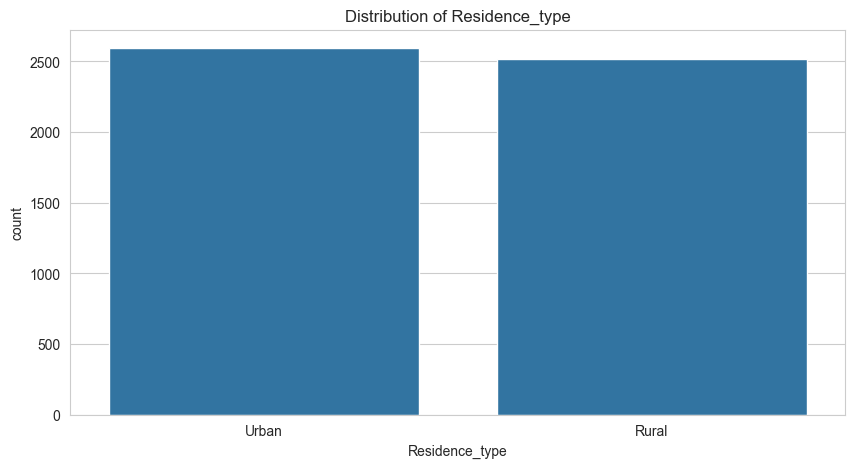

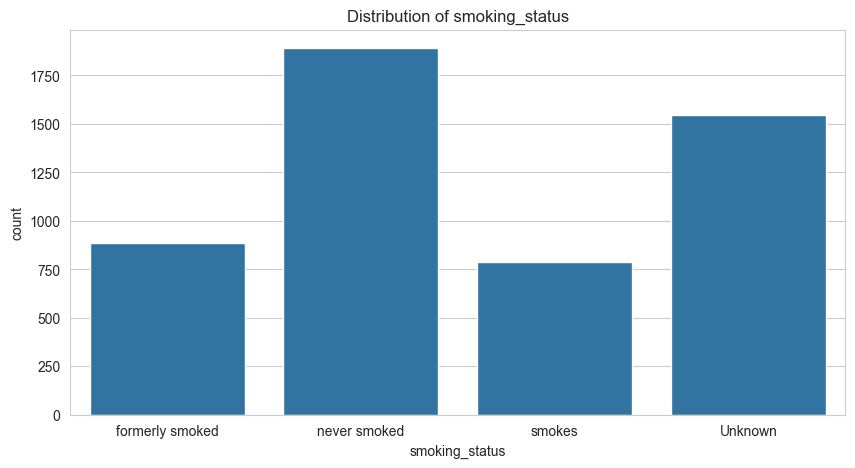

In [13]:
# Visualize distribution for categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()    

In [14]:
# Exclude 'id' column and identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('id')  # Exclude 'id'

### Distribution of Numerical Features


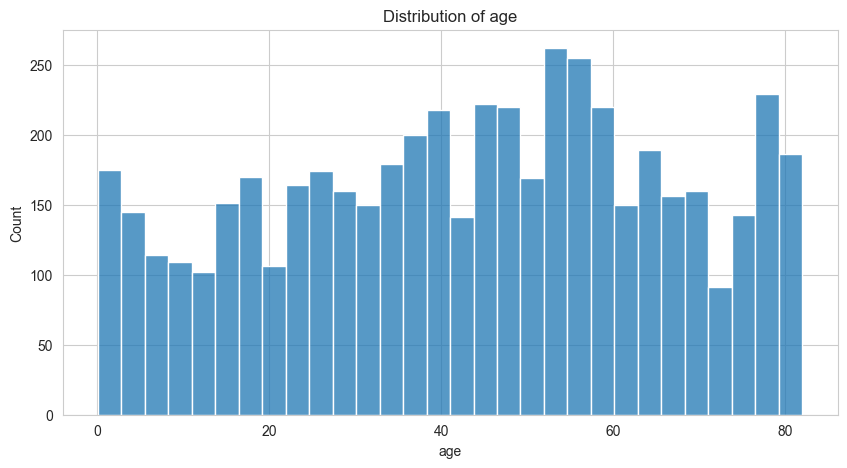

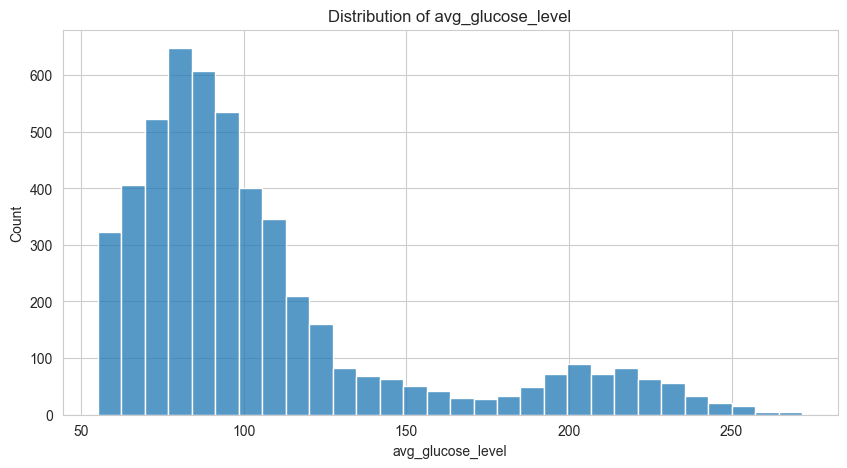

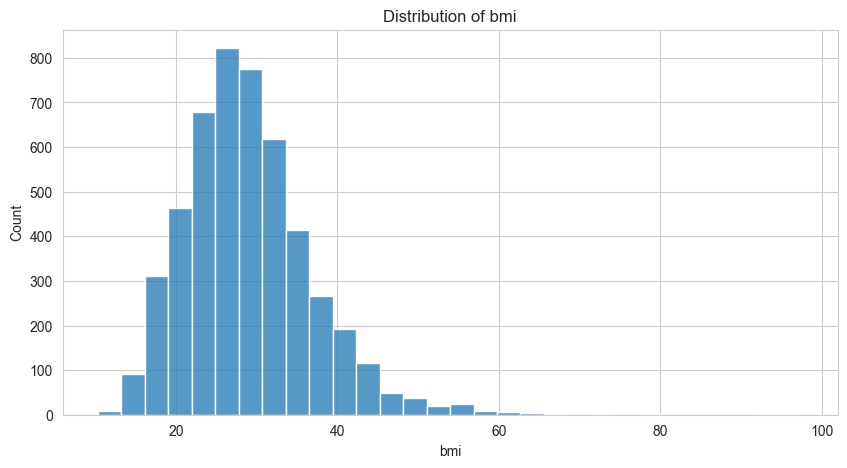

In [15]:
# Separate continuous and boolean numerical columns
continuous_columns = ['age', 'avg_glucose_level', 'bmi']

# Plot distributions for continuous numerical features
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

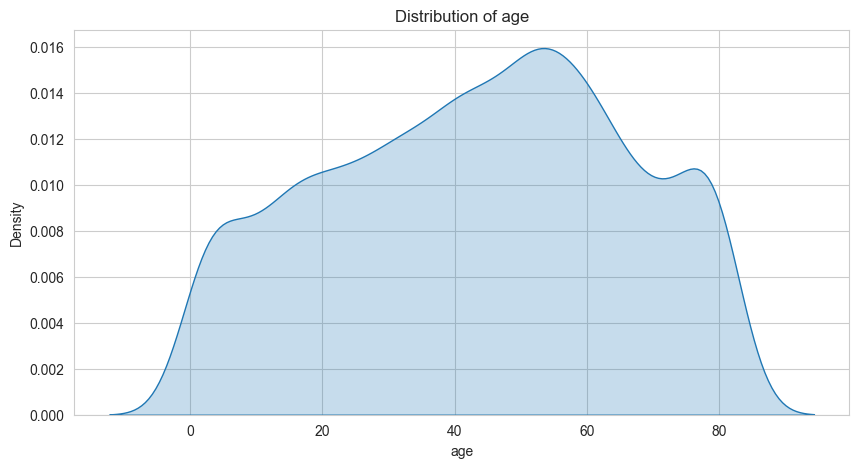

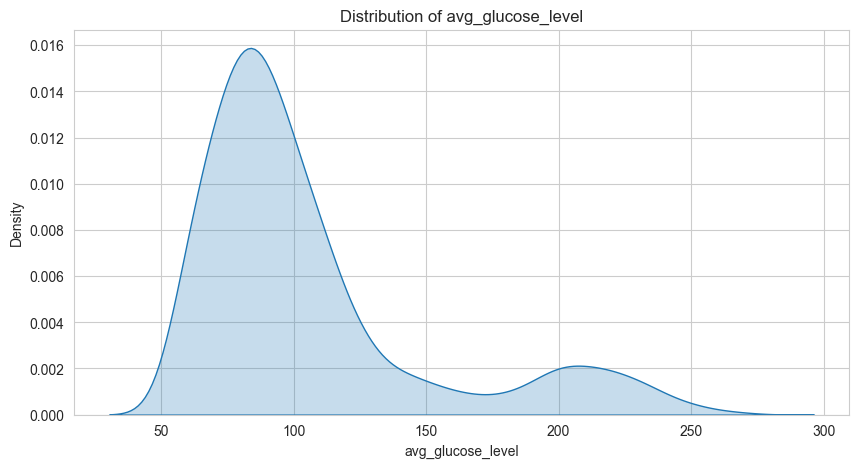

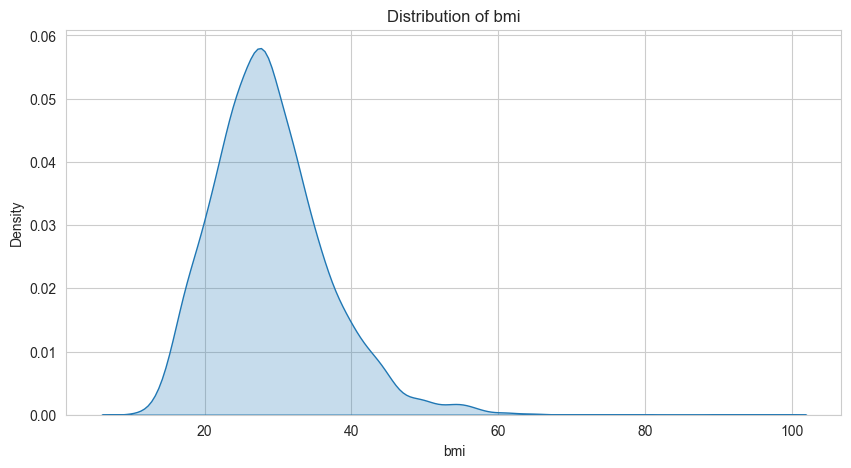

In [16]:
# Function to plot box plot for a given column
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column_name], fill=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Columns to examine
columns_to_examine = ['age', 'avg_glucose_level', 'bmi']  # Specify the columns you want to examine

# Plot box plots for each column
for column in columns_to_examine:
    plot_box(column)

### Distribution of Boolean Features

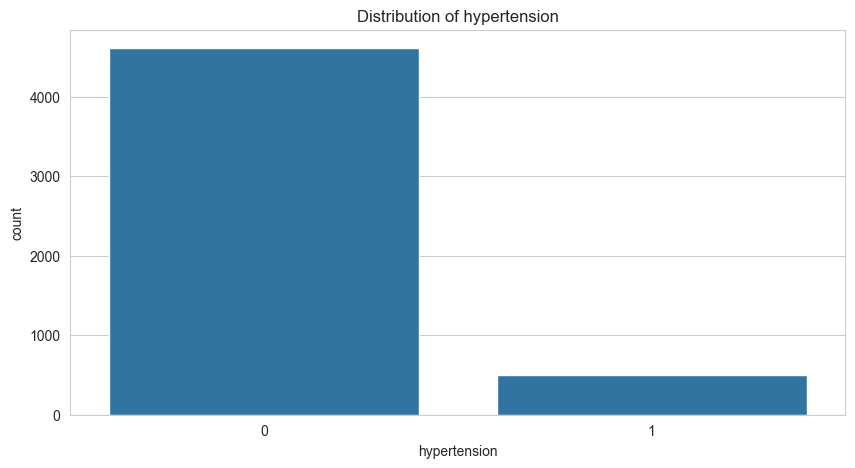

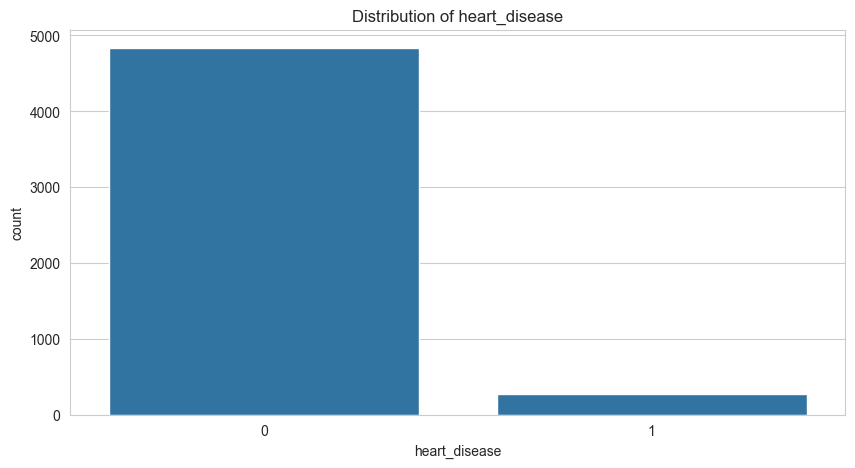

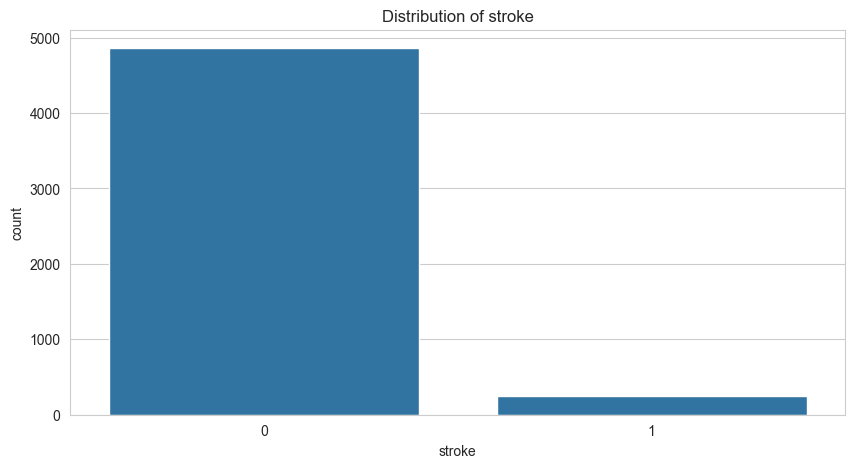

In [17]:
boolean_columns = ['hypertension', 'heart_disease', 'stroke']

# Plot distributions for boolean numerical features
for col in boolean_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


### Box Plots for Outliers

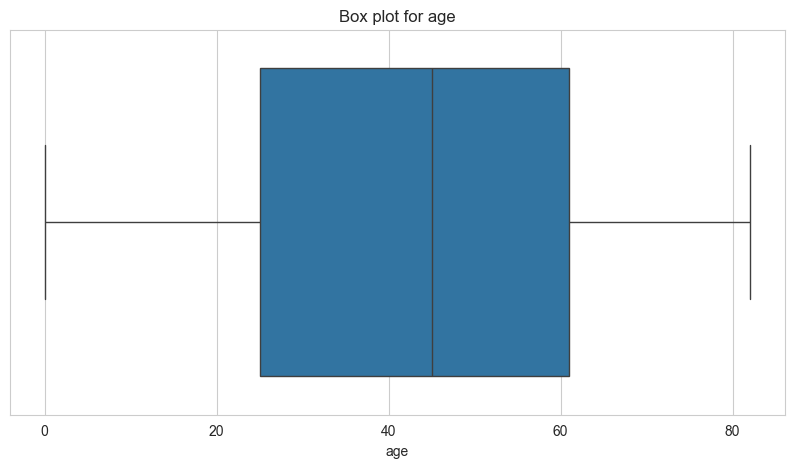

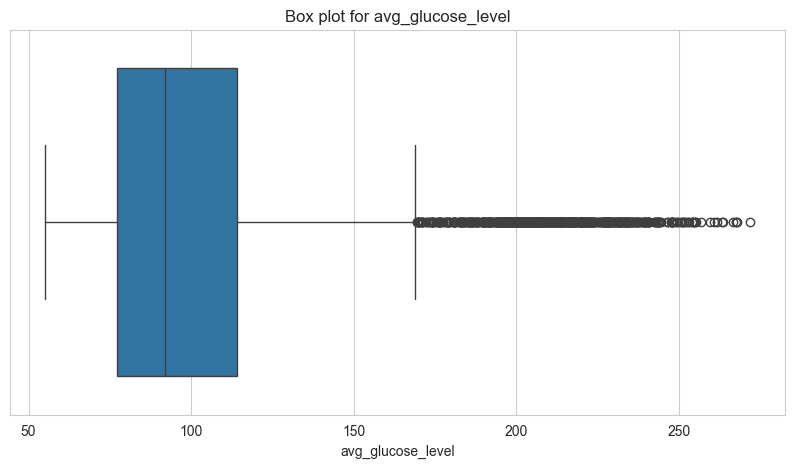

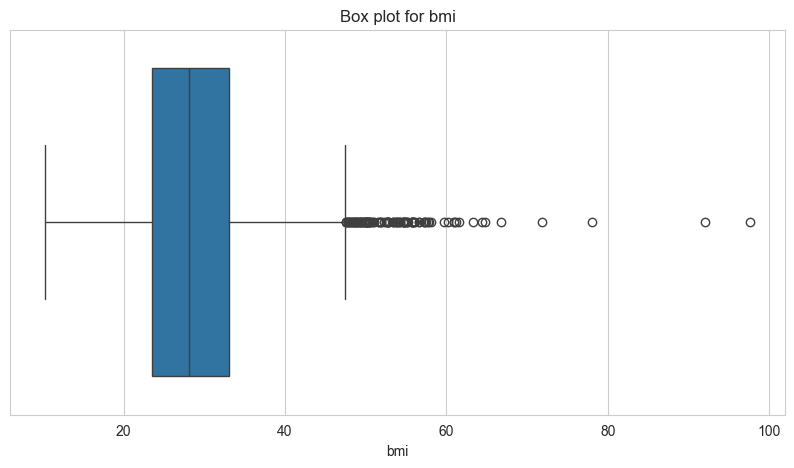

In [18]:
# Function to plot box plot for a given column
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box plot for {column_name}')
    plt.show()

# Columns to examine
columns_to_examine = ['age', 'avg_glucose_level', 'bmi']  # Specify the columns you want to examine

# Plot box plots for each column
for column in columns_to_examine:
    plot_box(column)


### Summary Statistics and Outliers

In [19]:
def examine_outliers(column_name):
    # Summary statistics
    summary = df[column_name].describe()
    print(f"Summary statistics for {column_name}:\n{summary.round(3)}\n")
    
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Quartiles and IQR: \n")
    print(f"Q1: {Q1.round(3)}, Q3: {Q3.round(3)}")
    print(f"IQR: {IQR.__round__(3)}")
    print(f"Outlier bounds for {column_name}: \n")
    print(f"Lower bound: {lower_bound.__round__(3)}, Upper bound: {upper_bound.__round__(3)}\n")
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers in {column_name}: {outliers.shape[0]}")
    print(f"Outliers:\n{outliers[[column_name]]}\n")

# Examine outliers for each column
for column in columns_to_examine:
    examine_outliers(column)

Summary statistics for age:
count    5110.000
mean       43.227
std        22.613
min         0.080
25%        25.000
50%        45.000
75%        61.000
max        82.000
Name: age, dtype: float64

Quartiles and IQR: 

Q1: 25.0, Q3: 61.0
IQR: 36.0
Outlier bounds for age: 

Lower bound: -29.0, Upper bound: 115.0

Number of outliers in age: 0
Outliers:
Empty DataFrame
Columns: [age]
Index: []

Summary statistics for avg_glucose_level:
count    5110.000
mean      106.148
std        45.284
min        55.120
25%        77.245
50%        91.885
75%       114.090
max       271.740
Name: avg_glucose_level, dtype: float64

Quartiles and IQR: 

Q1: 77.245, Q3: 114.09
IQR: 36.845
Outlier bounds for avg_glucose_level: 

Lower bound: 21.978, Upper bound: 169.358

Number of outliers in avg_glucose_level: 627
Outliers:
      avg_glucose_level
0                228.69
1                202.21
3                171.23
4                174.12
5                186.21
...                 ...
5061           

### Pie Chart for Stroke

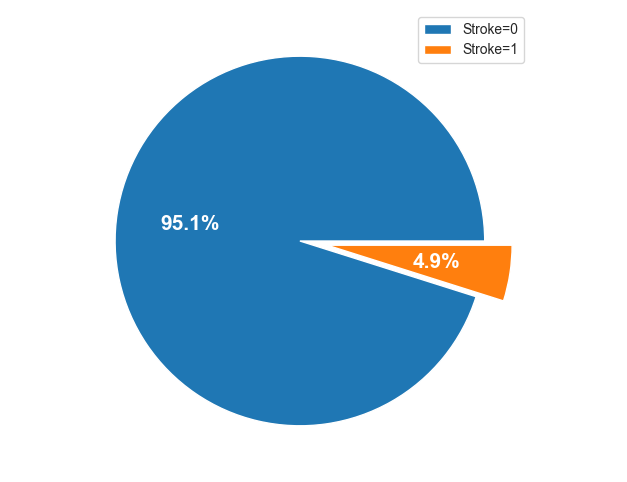

In [20]:
x = df['stroke'].value_counts()

explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=False, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

### Correlation Matrix

                        age  avg_glucose_level       bmi  hypertension  \
age                1.000000           0.238171  0.333398      0.276398   
avg_glucose_level  0.238171           1.000000  0.175502      0.174474   
bmi                0.333398           0.175502  1.000000      0.167811   
hypertension       0.276398           0.174474  0.167811      1.000000   
heart_disease      0.263796           0.161857  0.041357      0.108306   
stroke             0.245257           0.131945  0.042374      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
avg_glucose_level       0.161857  0.131945  
bmi                     0.041357  0.042374  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


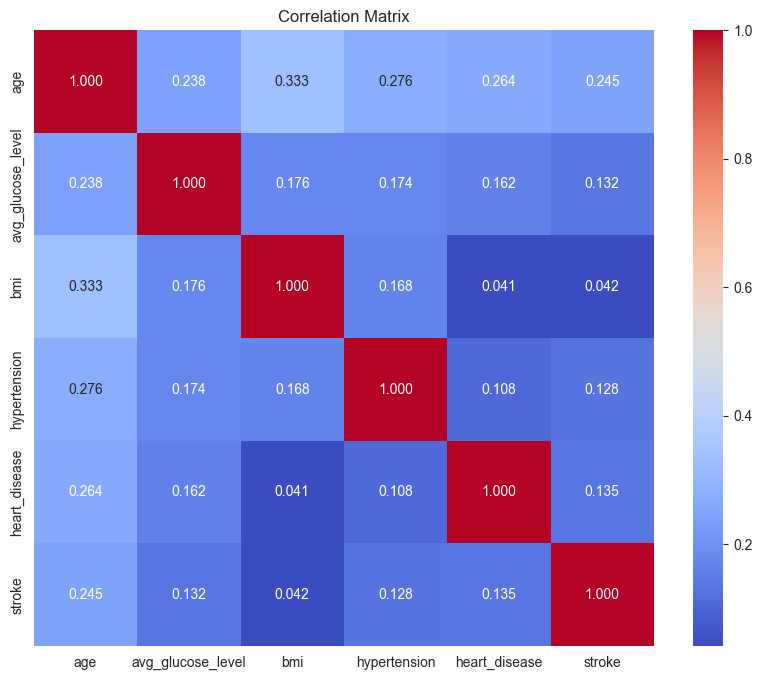

In [21]:
# Select the subset of columns
subset_df = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']]

# Calculate the correlation matrix for the selected subset
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()


### Strongest Correlations with 'Stroke'

In [22]:
strong_correlations = correlation_matrix['stroke'].sort_values(ascending=False)
print(strong_correlations)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


# Data Preprocessing

## Drop Unnecessary Columns

In [23]:
# Drop 'id' column
df.drop('id', axis=1, inplace=True)


## Fill Missing Values

In [24]:
# Fill missing values in 'bmi' column with the mean
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

# Check for missing values after filling
missing_values = df.isnull().sum()
print("Missing values after filling:\n", missing_values)

Missing values after filling:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Encode Categorical Features

In [25]:
# one hot encoding for categorical columns
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], drop_first=False)
# binary encoding for ever_married column
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,1,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,1,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,1,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


## Feature Scaling

### Standardization

In [26]:
# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['stroke']))

### Normalization

In [27]:
# Normalization
normalizer = MinMaxScaler()
df_normalized = normalizer.fit_transform(df.drop(columns=['stroke']))



## SMOTE

### Seperate the dataset into features and target variable

In [28]:
# Separate features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

### Split the dataset

In [29]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Before OverSampling

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 160
Before OverSampling, counts of label '0': 3417 



### Apply SMOTE

In [31]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X_train, y_train)

### After OverSampling

In [32]:
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)) )



After OverSampling, the shape of train_X: (6834, 20)
After OverSampling, the shape of train_y: (6834,) 

After OverSampling, counts of label '1': 3417
After OverSampling, counts of label '0': 3417


## Distribution of Target Variable


### Check distribution of target variable in the original data

In [33]:
# Check distribution of target variable in original data
print("Original class distribution in the dataset:")
print(df['stroke'].value_counts())

Original class distribution in the dataset:
stroke
0    4861
1     249
Name: count, dtype: int64


### Check distribution of target variable in the resampled training data

In [34]:
# Check distribution of target variable in the resampled training data
print("Class distribution in training data after SMOTE:")
print(y_res.value_counts())

Class distribution in training data after SMOTE:
stroke
0    3417
1    3417
Name: count, dtype: int64


## Feature Selection using Variance Threshold 

In [35]:
# Remove low variance features
selector = VarianceThreshold(threshold=0.1)
df_reduced = selector.fit_transform(df.drop(columns=['stroke']))


# Train Machine Learning Models

## Support Vector Machine

### Split the data

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Train the model

In [37]:
SVM = SVC(random_state=42)

# Fit the model
SVM.fit(X_train, y_train)

SVC(random_state=42)

### Predictions

In [38]:
# Predict on training and test set
y_pred_train = SVM.predict(X_train)
y_pred_test = SVM.predict(X_test)

### Evaluation

#### Evaluate on the training set

Accuracy (Train set): 0.7744649716480703
Confusion Matrix (train set):
[[1928  792]
 [ 441 2306]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2720
           1       0.74      0.84      0.79      2747

    accuracy                           0.77      5467
   macro avg       0.78      0.77      0.77      5467
weighted avg       0.78      0.77      0.77      5467



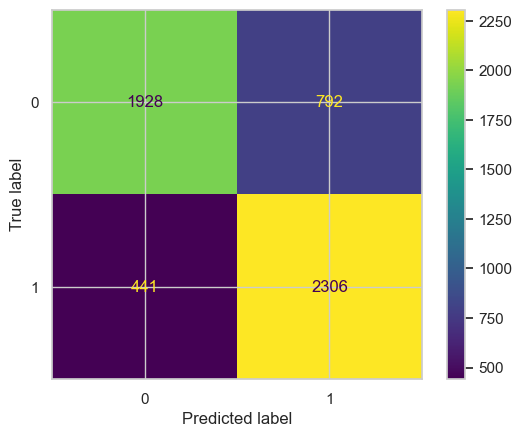

In [39]:
# Evaluate on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()


#### Evaluate on the test set

Accuracy (Test set): 0.7768836869056328
Confusion Matrix (Test set):
[[496 201]
 [104 566]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       697
           1       0.74      0.84      0.79       670

    accuracy                           0.78      1367
   macro avg       0.78      0.78      0.78      1367
weighted avg       0.78      0.78      0.78      1367



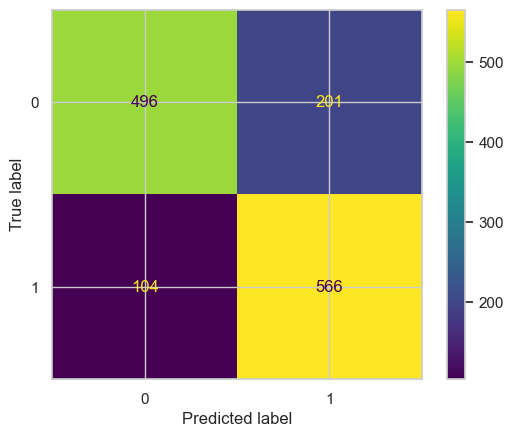

In [40]:
# Evaluate on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

#### Compare the scores on training and test set

In [41]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(SVM.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(SVM.score(X_test, y_test)))

Training set score: 0.7745
Test set score: 0.7769


### Hyperparameter Tuning

#### Define the parameter grid

In [42]:
# Define the parameter grid 
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


#### Instantiate the model and GridSearchCV object

In [43]:
svm = SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


#### Fit the GridSearchCV

In [44]:
# Fit the GridSearchCV 
grid_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

#### Get the best parameters and best score

In [45]:
# Get the best parameters and best score
print("Best parameters found for SVM: ", grid_search_svm.best_params_)
print("Best accuracy found for SVM: ", grid_search_svm.best_score_)

Best parameters found for SVM:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best accuracy found for SVM:  0.9584783729629471


#### Use the best estimator to make predictions

In [46]:
# Use the best estimator to make predictions
best_svm = grid_search_svm.best_estimator_
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)

#### Evaluate the model

##### Evaluate on the training set

Accuracy (Train set): 0.9584781415767332
Confusion Matrix (train set):
[[2720    0]
 [ 227 2520]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2720
           1       1.00      0.92      0.96      2747

    accuracy                           0.96      5467
   macro avg       0.96      0.96      0.96      5467
weighted avg       0.96      0.96      0.96      5467



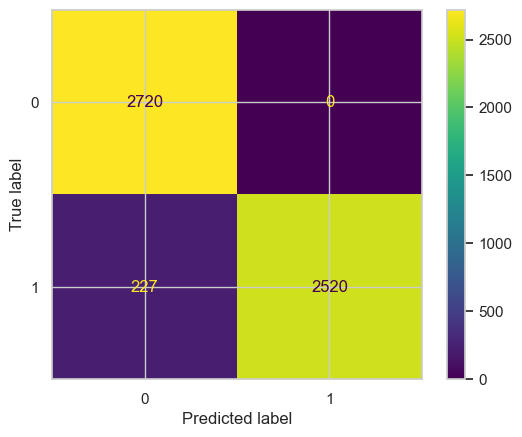

In [47]:
# Evaluate on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

##### Evaluate on the test set

Accuracy (Test set): 0.964155084125823
Confusion Matrix (Test set):
[[697   0]
 [ 49 621]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       697
           1       1.00      0.93      0.96       670

    accuracy                           0.96      1367
   macro avg       0.97      0.96      0.96      1367
weighted avg       0.97      0.96      0.96      1367



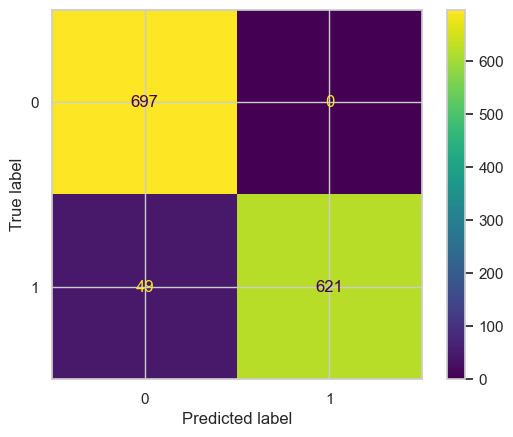

In [48]:
# Evaluate on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

##### Compare the scores on training and test set

In [49]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(best_svm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_svm.score(X_test, y_test)))

Training set score: 0.9585
Test set score: 0.9642


## Naive Bayes

### Split the data

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Train the model

In [51]:
NB = GaussianNB()

# Fit the model
NB.fit(X_train, y_train)


GaussianNB()

### Predictions

In [52]:
# Predict on training and test set
y_pred_train = NB.predict(X_train)
y_pred_test = NB.predict(X_test)

### Evaluation

#### Evaluate on the training set

Accuracy (Train set): 0.6917870861532833
Confusion Matrix (train set):
[[1074 1646]
 [  39 2708]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       0.96      0.39      0.56      2720
           1       0.62      0.99      0.76      2747

    accuracy                           0.69      5467
   macro avg       0.79      0.69      0.66      5467
weighted avg       0.79      0.69      0.66      5467



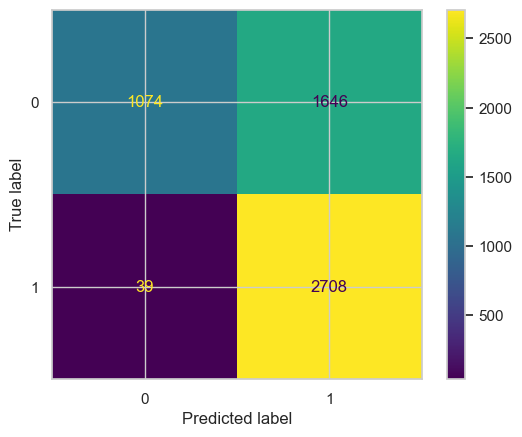

In [53]:
# Evaluate on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

#### Evaluate on the test set

Accuracy (Test set): 0.675932699341624
Confusion Matrix (Test set):
[[262 435]
 [  8 662]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.97      0.38      0.54       697
           1       0.60      0.99      0.75       670

    accuracy                           0.68      1367
   macro avg       0.79      0.68      0.65      1367
weighted avg       0.79      0.68      0.64      1367



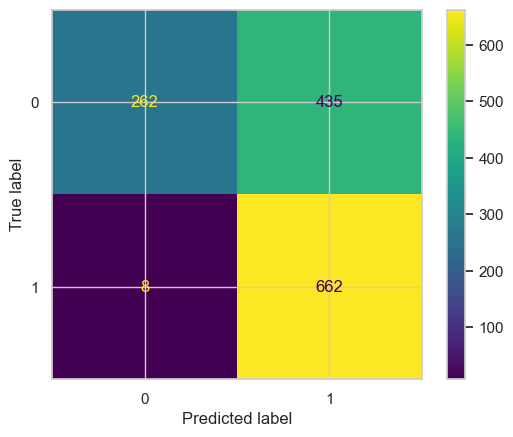

In [54]:
# Evaluate on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

#### Compare the scores on training and test set

In [55]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(NB.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(NB.score(X_test, y_test)))

Training set score: 0.6918
Test set score: 0.6759


### Hyperparameter Tuning

#### Define the parameter grid for Naive Bayes

In [56]:
# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

#### Instantiate the model and GridSearchCV object

In [57]:
nb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

#### Fit the GridSearchCV

In [58]:
# Fit the GridSearchCV object to the data
grid_search_nb.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=2)

#### Get the best parameters and best score

In [59]:

# Get the best parameters and best score
print("Best parameters found for Naive Bayes: ", grid_search_nb.best_params_)
print("Best accuracy found for Naive Bayes: ", grid_search_nb.best_score_)

Best parameters found for Naive Bayes:  {'var_smoothing': 1e-05}
Best accuracy found for Naive Bayes:  0.8298890121930634


#### Use the best estimator to make predictions

In [60]:
# Use the best estimator to make predictions
best_nb = grid_search_nb.best_estimator_
y_pred_train = best_nb.predict(X_train)
y_pred_test = best_nb.predict(X_test)

#### Evaluate the model

##### Evaluate on the training set

Accuracy (Train set): 0.8320834095481983
Confusion Matrix (train set):
[[1929  791]
 [ 127 2620]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2720
           1       0.77      0.95      0.85      2747

    accuracy                           0.83      5467
   macro avg       0.85      0.83      0.83      5467
weighted avg       0.85      0.83      0.83      5467



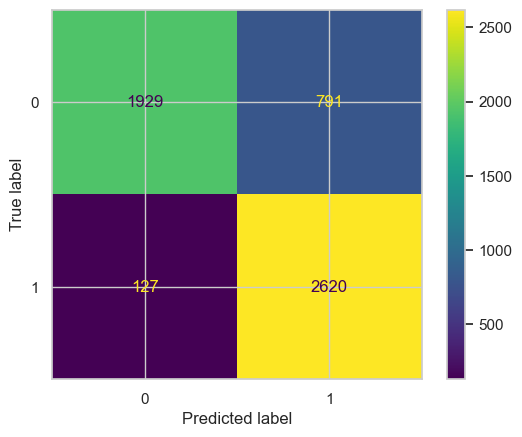

In [61]:
# Evaluate on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()


##### Evaluate on the test set

Accuracy (Test set): 0.8346744696415508
Confusion Matrix (Test set):
[[501 196]
 [ 30 640]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       697
           1       0.77      0.96      0.85       670

    accuracy                           0.83      1367
   macro avg       0.85      0.84      0.83      1367
weighted avg       0.86      0.83      0.83      1367



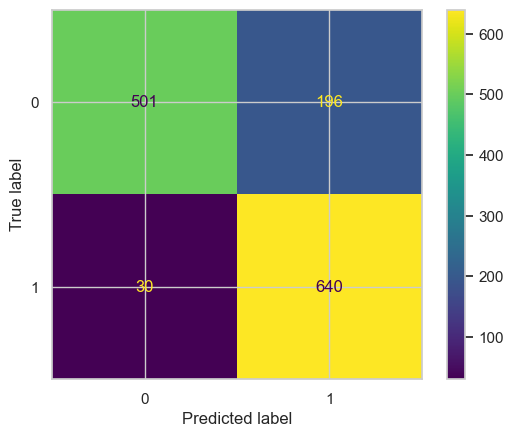

In [62]:
# Evaluate on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

##### Compare the scores on training and test set

In [63]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(best_nb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_nb.score(X_test, y_test)))


Training set score: 0.8321
Test set score: 0.8347


## Random Forest

### Split the data

In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


### Train the model

In [65]:
# Instantiate the model
RF = RandomForestClassifier(random_state=42)

# fit the model
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [66]:
y_pred_test = RF.predict(X_test)
y_pred_train = RF.predict(X_train)

### Evaluation

#### Evaluate on the training set

Accuracy (Train set): 1.0
Confusion Matrix (train set):
[[2720    0]
 [   0 2747]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2720
           1       1.00      1.00      1.00      2747

    accuracy                           1.00      5467
   macro avg       1.00      1.00      1.00      5467
weighted avg       1.00      1.00      1.00      5467



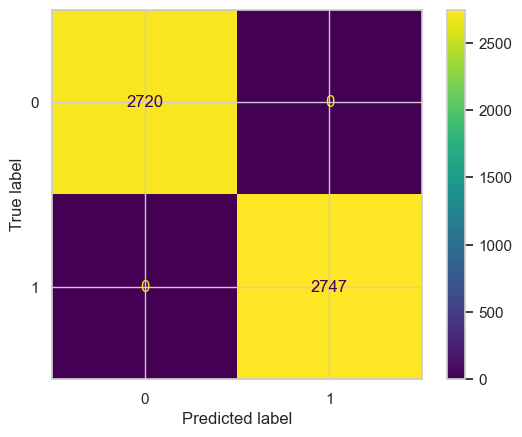

In [67]:
# Calculate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)

# Display the confusion matrix
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))

# Display the classification report
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))

# confusion matrix plot
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

#### Evaluate on the test set

Accuracy (Test set): 0.9773226042428675
Confusion Matrix (Test set):
[[688   9]
 [ 22 648]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       697
           1       0.99      0.97      0.98       670

    accuracy                           0.98      1367
   macro avg       0.98      0.98      0.98      1367
weighted avg       0.98      0.98      0.98      1367



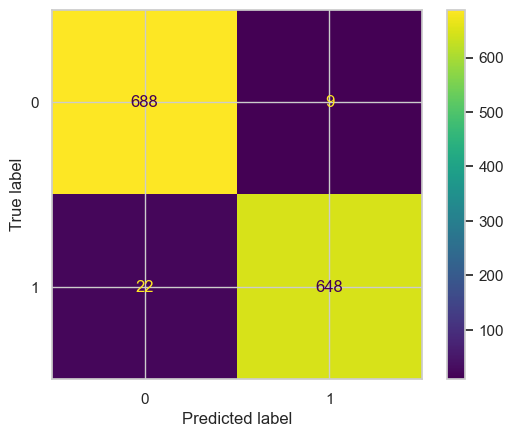

In [68]:
# Calculate the accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)

# Display the confusion matrix
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))

# Display the classification report
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))

# confusion matrix plot
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()

#### Compare the scores on training and test set

In [69]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(RF.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(RF.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9773


### Hyperparameter Tuning

#### Define the parameter grid

In [70]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#### Instantiate the model and GridSearchCV object

In [71]:
#  Random Forest model
RF = RandomForestClassifier(random_state=42)

#  GridSearchCV object
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


#### Fit the GridSearchCV

In [72]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

#### Get the best parameters and best score

In [73]:
# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found:  0.9723801994235948


#### Use the best estimator to make predictions

In [74]:
# Use the best estimator to make predictions
best_RF = grid_search.best_estimator_
y_pred_train = best_RF.predict(X_train)
y_pred_test = best_RF.predict(X_test)

#### Evaluate the model

##### Evaluate on the training set

Accuracy (Train set): 1.0
Confusion Matrix (train set):
[[2720    0]
 [   0 2747]]
Classification Report (train set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2720
           1       1.00      1.00      1.00      2747

    accuracy                           1.00      5467
   macro avg       1.00      1.00      1.00      5467
weighted avg       1.00      1.00      1.00      5467



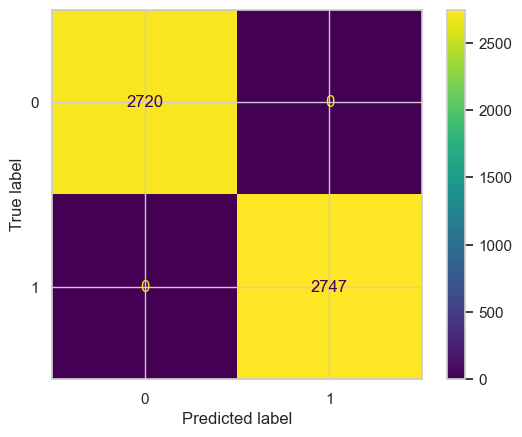

In [75]:
# Evaluate on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy (Train set):", accuracy_train)
print("Confusion Matrix (train set):")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report (train set):")
print(classification_report(y_train, y_pred_train))
confusing_matrix = confusion_matrix(y_train, y_pred_train)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()


##### Evaluate on the test set

Accuracy (Test set): 0.978054133138259
Confusion Matrix (Test set):
[[689   8]
 [ 22 648]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       697
           1       0.99      0.97      0.98       670

    accuracy                           0.98      1367
   macro avg       0.98      0.98      0.98      1367
weighted avg       0.98      0.98      0.98      1367



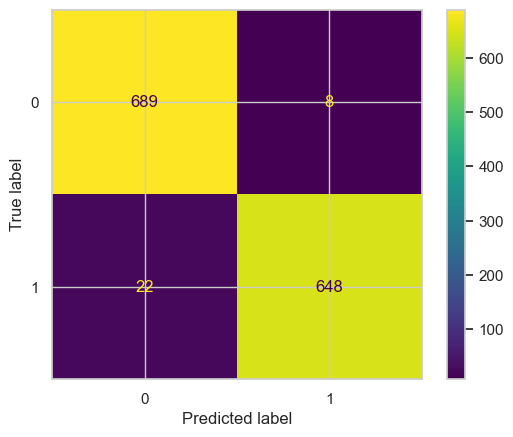

In [76]:
# Evaluate on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test set):", accuracy_test)
print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))
confusing_matrix = confusion_matrix(y_test, y_pred_test)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()


##### Compare the scores on training and test set

In [77]:
# Compare the scores on training and test set
print('Training set score: {:.4f}'.format(best_RF.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_RF.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9781
